## Exploracion de datasets

In [3]:
import pandas as pd
from IPython.display import HTML

### 2015

,Codigo Partido,Denominacion
0,3,UNION CIVICA RADICAL ...
1,12,COMUNISTA ...
2,13,MOVIMIENTO AL SOCIALISMO ...
3,23,UNION POPULAR ...
4,38,MST-MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES ...
5,50,SOCIALISTA ...
6,57,MOVIMIENTO DE ACCION VECINAL ...
7,63,ES POSIBLE ...
8,64,PROPUESTA REPUBLICANA ...
9,68,NUEVA IZQUIERDA ...


In [208]:
COD_PROV = pd.read_csv('./codigos/COD_PROVINCIAS.csv', ';').rename(columns = {'NOMBRE': 'PROVINCIA'})
COD_DEP = pd.read_csv('./codigos/COD_DEPARTAMENTOS.csv', ';').rename(columns = {'NOMBRE': 'DEPARTAMENTO'})

#Load data
primera_vuelta_2015 = pd.concat([pd.read_csv('./escrutinio/2015/FMESDN_0101.csv', ';'),
                            pd.read_csv('./escrutinio/2015/FMESDN_0202.csv', ';'),
                            pd.read_csv('./escrutinio/2015/FMESDN_0313.csv', ';'),
                            pd.read_csv('./escrutinio/2015/FMESPR_1424.csv', ';')])

COD_PARTIDOS = pd.read_csv('./codigos/COD_PARTIDOS_2015.csv', ';', encoding = 'latin-1')[[u'Codigo Partido', u'Denominacion']]
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.replace('CAMBIEMOS BUENOS AIRES', 'ALIANZA CAMBIEMOS').str.strip()

primera_vuelta_2015 = primera_vuelta_2015.merge(COD_PARTIDOS, left_on = u'CODIGO VOTOS', right_on = u'Codigo Partido')
# # primera_vuelta_2015.groupby([u'Codigo Partido', u'Denominacion']).sum().sort_values(by = 'VOTOS')[['VOTOS']].tail(10)

primera_vuelta_2015 = primera_vuelta_2015.merge(COD_PROV).merge(COD_DEP, on = ['CODIGO DEPARTAMENTO', u'CODIGO PROVINCIA'])


In [211]:
table = primera_vuelta_2015.groupby(['PROVINCIA', 'Denominacion'])[['VOTOS']].sum().unstack()['VOTOS']
# table[table.sum().sort_values(ascending = False).index.values].dropna(subset = ['ALIANZA CAMBIEMOS'])
table[table.sum().sort_values(ascending = False).index.values].loc[['BUENOS AIRES', 'CIUDAD AUTONOMA DE BS.AS.']].T.head(8)


PROVINCIA,BUENOS AIRES,CIUDAD AUTONOMA DE BS.AS.
Denominacion,,
ELECTORES,12033279.0,2539182.0
VOTANTES,9309308.0,1904167.0
ALIANZA FRENTE PARA LA VICTORIA,3212919.0,433309.0
ALIANZA CAMBIEMOS,2928287.0,885603.0
ALIANZA UNIDOS POR UNA NUEVA ALTERNATIVA (UNA),1812554.0,277722.0
VOTOS BLANCOS,747411.0,43756.0
ALIANZA FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES,389846.0,106310.0
ALIANZA PROGRESISTAS,307615.0,165116.0


In [181]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [202]:
paso_2017 = pd.concat([pd.read_csv('./escrutinio/2017/paso2017-FMESDN_0101.csv', ';'),
                            pd.read_csv('./escrutinio/2017/paso2017-FMESDN_0202.csv', ';'),
                            pd.read_csv('./escrutinio/2017/paso2017-FMESDN_0313.csv', ';'),
                            pd.read_csv('./escrutinio/2017/paso2017-FMESDN_1424.csv', ';')])

COD_PARTIDOS = pd.read_csv('./codigos/COD_PARTIDOS_2017_paso.csv', ';', encoding = 'latin-1')[[u'Código Partido', u'Denominacion']]
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.strip()
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.replace('CAMBIEMOS BUENOS AIRES', 'CAMBIEMOS')
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.replace('VAMOS JUNTOS', 'CAMBIEMOS')
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.replace(u'UNIDAD PORTEÑA', 'UNIDAD CIUDADANA')

paso_2017 = paso_2017.merge(COD_PARTIDOS, left_on = u'CODIGO VOTOS', right_on = u'Código Partido')
paso_2017 = paso_2017.merge(COD_PROV)#.merge(COD_DEP, on = ['CODIGO DEPARTAMENTO', u'CODIGO PROVINCIA'])


In [197]:
pd.options.display.max_columns = 99

In [212]:
table = paso_2017.groupby(['PROVINCIA', 'Denominacion'])[['VOTOS']].sum().unstack()['VOTOS']
table[table.sum().sort_values(ascending = False).index.values].loc[['BUENOS AIRES', 'CIUDAD AUTONOMA DE BS.AS.']].T.head(8)

PROVINCIA,BUENOS AIRES,CIUDAD AUTONOMA DE BS.AS.
Denominacion,,
ELECTORES,12315254.0,2540009.0
VOTANTES,8849316.0,1519875.0
CAMBIEMOS,3072235.0,935324.0
UNIDAD CIUDADANA,2875715.0,391264.0
1PAIS,1313074.0,NaN
FRENTE JUSTICIALISTA,496267.0,NaN
VOTOS BLANCOS,446462.0,21280.0
FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES,321464.0,71460.0


In [216]:
primera_vuelta_2017 = pd.concat([pd.read_csv('./escrutinio/2017/FMESDN_0101.csv', ';'),
                            pd.read_csv('./escrutinio/2017/FMESDN_0202.csv', ';'),
                            pd.read_csv('./escrutinio/2017/PV_0313.csv', ';'),
                            pd.read_csv('./escrutinio/2017/FMESDN_1424.csv', ';')])

COD_PARTIDOS = pd.read_csv('./codigos/COD_PARTIDOS_2017.csv', ';', encoding = 'latin-1')[[u'Código Partido', u'Denominacion']]
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.strip()
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.replace('CAMBIEMOS BUENOS AIRES', 'CAMBIEMOS')
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.replace('VAMOS JUNTOS', 'CAMBIEMOS')
COD_PARTIDOS['Denominacion'] = COD_PARTIDOS['Denominacion'].str.replace(u'UNIDAD PORTEÑA', 'UNIDAD CIUDADANA')

primera_vuelta_2017 = primera_vuelta_2017.merge(COD_PARTIDOS, left_on = u'CODIGO VOTOS', right_on = u'Código Partido')
# primera_vuelta_2017.groupby(u'Denominacion').sum().sort_values(by = 'VOTOS').tail(10)[['VOTOS']]

primera_vuelta_2017 = primera_vuelta_2017.merge(COD_PROV)#.merge(COD_DEP, on = ['CODIGO DEPARTAMENTO', u'CODIGO PROVINCIA'])


In [217]:
table = primera_vuelta_2017.groupby(['PROVINCIA', 'Denominacion'])[['VOTOS']].sum().unstack()['VOTOS']
table[table.sum().sort_values(ascending = False).index.values].loc[['BUENOS AIRES', 'CIUDAD AUTONOMA DE BS.AS.']].T.head(8)

PROVINCIA,BUENOS AIRES,CIUDAD AUTONOMA DE BS.AS.
Denominacion,,
ELECTORES,12796134.0,2548586.0
VOTANTES,9646507.0,1750128.0
CAMBIEMOS,3896150.0,974886.0
UNIDAD CIUDADANA,3348210.0,416225.0
1PAIS,1019090.0,NaN
FRENTE JUSTICIALISTA,481533.0,NaN
FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES,492627.0,111160.0
VOTOS BLANCOS,346672.0,15572.0


In [69]:

# data = dict({131: 'FPV', 135: 'CAMBIEMOS', 137: 'FIT', 132: 'PROGRESISTAS', 133: 'COMP. FEDERAL',
#                                9001: 'VOTANTES', 9002: 'EMITIDOS', 9003: 'NA_1', 9004: 'BLANCO', 9005: 'ANULADOS', 9006: 'NA_2'})
# COD_listas_2015 = pd.DataFrame(data, index = ['PARTIDO']).T.reset_index()
# COD_listas_2015.columns = ['CODIGO VOTOS', 'PARTIDO']

# primera_vuelta_2015 = primera_vuelta_2015.merge(COD_PROV).merge(COD_DEP, on = ['CODIGO DEPARTAMENTO', u'CODIGO PROVINCIA']).merge(COD_listas_2015)
# primera_vuelta_2015['ELECCION'] = 'PV_2015'
# # paso_2017 = paso_2017.merge(COD_PROV).merge(COD_listas_2015)
# primera_vuelta_2017 = primera_vuelta_2017.merge(COD_PROV).merge(COD_DEP, on = ['CODIGO DEPARTAMENTO', u'CODIGO PROVINCIA']).merge(COD_listas_2015)
# primera_vuelta_2017['ELECCION'] = 'PV_2017'

# primera_vuelta = pd.concat([primera_vuelta_2015, primera_vuelta_2017])

# #fix
# primera_vuelta.columns = primera_vuelta.columns.str.strip()
# primera_vuelta['CODIGO CIRCUITO'] = primera_vuelta['CODIGO CIRCUITO'].astype(str).str.strip().str.zfill(4)

,CODIGO PROVINCIA,CODIGO DEPARTAMENTO,CODIGO MESA,CODIGO VOTOS,VOTOS,Código Partido
Denominacion,,,,,,
VOTOS BLANCOS,789234,3014509,172437181,881167456,602722,881167456
FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES,428994,2752029,105886522,31114574,783724,31114574
CAMBIEMOS,238455,115497,35664630,5858842,937938,5858842
VAMOS JUNTOS,7366,60739,27224437,4272280,974886,4272280
FRENTE JUSTICIALISTA,241607,2629910,62570091,24519768,986566,24519768
1PAIS,73838,2540983,30467447,18865609,1019090,18865609
UNIDAD CIUDADANA,73838,2540983,30467447,21191506,3348210,21191506
CAMBIEMOS BUENOS AIRES,73838,2540983,30467447,19124042,3896150,19124042
VOTANTES,789234,3014509,172437181,880971728,24619794,880971728


In [61]:
primera_vuelta_2017['CODIGO VOTOS'].unique()

array([9001, 9002, 9003, 9004, 9005, 9006,  187,  576,  580,  531,  503,
        515,  511,  574,  518,  546,  131,  135,   23,   71,   72,  165,
        184,  535,  559,  534,   40,  151,  186,  502,  513,  551,  575,
         47,   50,  501,  567,  523,   38,  203,  553,  566,  520,  539,
        564,  522,  512,  556,  172,  182,  565,  516,   70,   83,  176,
        577,  504,  188,  174,  202,  530,  510,  560,  554,   61,  558,
        541,  180,  548,  521,  167,  194,  207,  563,  540,  524])

In [51]:
COD_PARTIDOS.head()

,Código Partido,Denominacion
0,2,JUSTICIALISTA ...
1,6,INTRANSIGENTE ...
2,8,FEDERAL ...
3,22,HUMANISTA ...
4,23,UNION POPULAR ...


In [40]:
COD_PARTIDOS.columns

Index([u'Código Partido', u'Agrupación'], dtype='object')

In [63]:
pd.options.display.max_rows = 9999
df_in = primera_vuelta

votos_total = df_in.groupby(['PROVINCIA', 'DEPARTAMENTO', 'CODIGO CIRCUITO', 'PARTIDO', 'ELECCION'])[['VOTOS']].sum().unstack([-2, -1])['VOTOS']
# resumen_provincial = 100*votos_total.div(votos_total['VOTANTES'], axis = 0).round(4)[['CAMBIEMOS', 'FPV']]
# votos_total[['CAMBIEMOS', 'FPV']].diff(1, 1).diff(2, 1)
diff_votos_ganados_FPV_PRO = votos_total[['FPV', 'CAMBIEMOS']].diff(1, 1).diff(2, 1).iloc[:, 3:].reset_index()
diff_votos_ganados_FPV_PRO.columns = diff_votos_ganados_FPV_PRO.columns.get_level_values(0)
diff_votos_ganados_FPV_PRO = diff_votos_ganados_FPV_PRO.rename(columns = {'CAMBIEMOS': 'mejora_votos_CAMBIEMOS'})

In [2]:
votos_total[['FPV', 'CAMBIEMOS']].diff(1, 1)

NameError: name 'votos_total' is not defined

## Shapefile de circuitos electorales

In [183]:
import unidecode
import geopandas as gpd
df_list = []

for n in range(24):
    try:
        df_list += [gpd.read_file('./circuitos/circuito_'+str(n).zfill(2)+'/circuito_'+str(n).zfill(2)+'.shp')]
    except:
        pass

circuitos = pd.concat(df_list).reset_index(drop = True)
circuitos['circuito'] = circuitos['circuito'].str.zfill(4)
circuitos['provincia'] = [unidecode.unidecode(row) for row in circuitos['provincia'].str.upper()]
circuitos['departamen'] = [unidecode.unidecode(row) for row in circuitos['departamen'].str.upper()]
circuitos['provincia'] = circuitos['provincia'].str.replace('CIUDAD AUTONOMA DE BUENOS AIRES', 'CIUDAD AUTONOMA DE BS.AS.')

circuitos['departamen'] = circuitos['departamen'].str.replace('LA MATANZA', 'MATANZA').str.replace(
    '25 DE MAYO', 'VEINTICINCO DE MAYO').str.replace('9 DE JULIO', 'NUEVE DE JULIO').str.replace(
    'JOSE C. PAZ', 'J. C. PAZ')

circuitos.head()

,gid,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,3,01,CIUDAD AUTONOMA DE BS.AS.,COMUNA 1,Comuna 1,0003,02,001,POLYGON ((-58.35729390171709 -34.5951054556839...
1,42,01,CIUDAD AUTONOMA DE BS.AS.,COMUNA 4,Comuna 4,0045,02,004,POLYGON ((-58.40154738260488 -34.6468618265473...
2,34,01,CIUDAD AUTONOMA DE BS.AS.,COMUNA 3,Comuna 3,0037,02,003,POLYGON ((-58.40097393403207 -34.6186657623277...
3,17,01,CIUDAD AUTONOMA DE BS.AS.,COMUNA 1,Comuna 1,0018,02,001,POLYGON ((-58.38000957243059 -34.6221427458695...
4,164,01,CIUDAD AUTONOMA DE BS.AS.,COMUNA 13,Comuna 13,0141,02,013,POLYGON ((-58.42519022661396 -34.5491436609710...


In [193]:
merged = diff_votos_ganados_FPV_PRO.merge(circuitos[['provincia', 'circuito', 'geometry']], 
                                 left_on = [u'PROVINCIA', u'CODIGO CIRCUITO'],
                                right_on = [u'provincia', u'circuito'], how = 'outer', indicator = True)
merged = merged.dropna()
# merged = merged.loc[merged.PROVINCIA.isin(['BUENOS AIRES', 'CIUDAD AUTONOMA DE BS.AS.'])].dropna()

merged['DEPARTAMENTO'] = [unidecode.unidecode(row) for row in merged['DEPARTAMENTO'].str.upper().str.decode('latin-1')]


In [191]:
# circuitos con mala data
# x = circuitos['circuito'].str.len()
# circuitos.loc[x.loc[x > 5].index]

,gid,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
1597,296,05,CORRIENTES,GOYA,,00012/A/B,18,070,POLYGON ((-59.27039107034993 -29.1725553526314...
1598,297,05,CORRIENTES,GOYA,,00012/A/B,18,070,POLYGON ((-59.28194068123513 -29.1619681280892...
1606,303,05,CORRIENTES,LAVALLE,,00036y màs,18,091,POLYGON ((-59.13162320736856 -28.7757026669248...
1607,304,05,CORRIENTES,GOYA,,00012/A/B,18,070,POLYGON ((-59.28780988671159 -29.0997617809541...
1817,938,07,CHUBUT,ESCALANTE,,0090 AL 0109,26,021,POLYGON ((-67.36649466219909 -45.7827449679235...
1863,975,07,CHUBUT,RAWSON,,0022 en verifi.,26,077,POLYGON ((-65.26184392351779 -43.2845659778558...
1864,976,07,CHUBUT,RAWSON,,0023 0024 en ver,26,077,POLYGON ((-65.42062114718246 -43.4876942541575...
2024,439,08,ENTRE RIOS,TALA,,001550000,30,091,POLYGON ((-59.27919845343411 -32.1812928755653...
2036,440,08,ENTRE RIOS,TALA,,001550000,30,091,POLYGON ((-59.38890722684414 -32.1326669488319...
2238,34,11,LA PAMPA,QUEMU QUEMU,Quemú Quemú,0063 0067,42,119,POLYGON ((-63.71703028311326 -36.3642126409551...


In [196]:
import numpy as np

merged['coords'] = [[np.vstack(geom.exterior.coords.xy).T.tolist()] if geom.type == 'Polygon' else None for geom in merged['geometry']]
merged['centroid'] = [np.vstack(geom.centroid.xy).T[0].tolist() if geom.type == 'Polygon' else None for geom in merged['geometry']]
  

### MAPBOX

In [197]:
def df_to_geojson(df, properties, type_, coordinates):
    """
    Turn a dataframe containing point data into a geojson formatted python dictionary
    
    df : the dataframe to convert to geojson
    properties : a list of columns in the dataframe to turn into geojson feature properties
    lat : the name of the column in the dataframe that contains latitude data
    lon : the name of the column in the dataframe that contains longitude data
    """
    
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}

    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':type_,
                               'coordinates':[]}}

        # fill in the coordinates
        
        feature['geometry']['coordinates'] = row[coordinates]

        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    
    return geojson

In [198]:
polys = df_to_geojson(merged, ['PROVINCIA', 'DEPARTAMENTO', 'CODIGO CIRCUITO', 'mejora_votos_CAMBIEMOS'], 
                      'Polygon','coords')
points = df_to_geojson(merged, ['PROVINCIA', 'DEPARTAMENTO', 'CODIGO CIRCUITO', 'mejora_votos_CAMBIEMOS'], 
                      'Point','centroid')


import json
with open('diff_votos_2015_2017_pts.geojson', 'w') as outfile:
    json.dump(points, outfile)
with open('diff_votos_2015_2017_polys.geojson', 'w') as outfile:
    json.dump(polys, outfile)

In [199]:
from mapbox import Uploader
import os
import unidecode

username = 'matuteiglesias'
token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'

service = Uploader(access_token=token)
with open('./diff_votos_2015_2017_pts.geojson', 'r') as src:
    upload_resp = service.upload(src, username+'.'+'diff_votos_15_17_pts')
with open('./diff_votos_2015_2017_polys.geojson', 'r') as src:
    upload_resp = service.upload(src, username+'.'+'diff_votos_15_17_ply')


## Unir circuitos con votos

In [1]:
## Conclusion, definir las siguientes columnas:
import matplotlib.pyplot as plt
%matplotlib inline

# fig, ax = plt.subplots(1, figsize = (15, 20))
# circuitos.sort_values(by = ['circuito']).plot(ax = ax)

# votos_por_circuito['circuito'] = votos_por_circuito['CODIGO CIRCUITO   '].astype(str).str.strip().str.zfill(4)
# votos_por_circuito['distrito'] = votos_por_circuito['CODIGO PROVINCIA'].astype(str).str.zfill(2)

# merged = votos_por_circuito.merge(circuitos[['circuito', 'distrito','geometry']])

#pasar a porcentajes:

# merged['VOTOS_pct'] = merged.groupby(['distrito', 'circuito'])['VOTOS'].apply(lambda x: 100*x/x.sum())


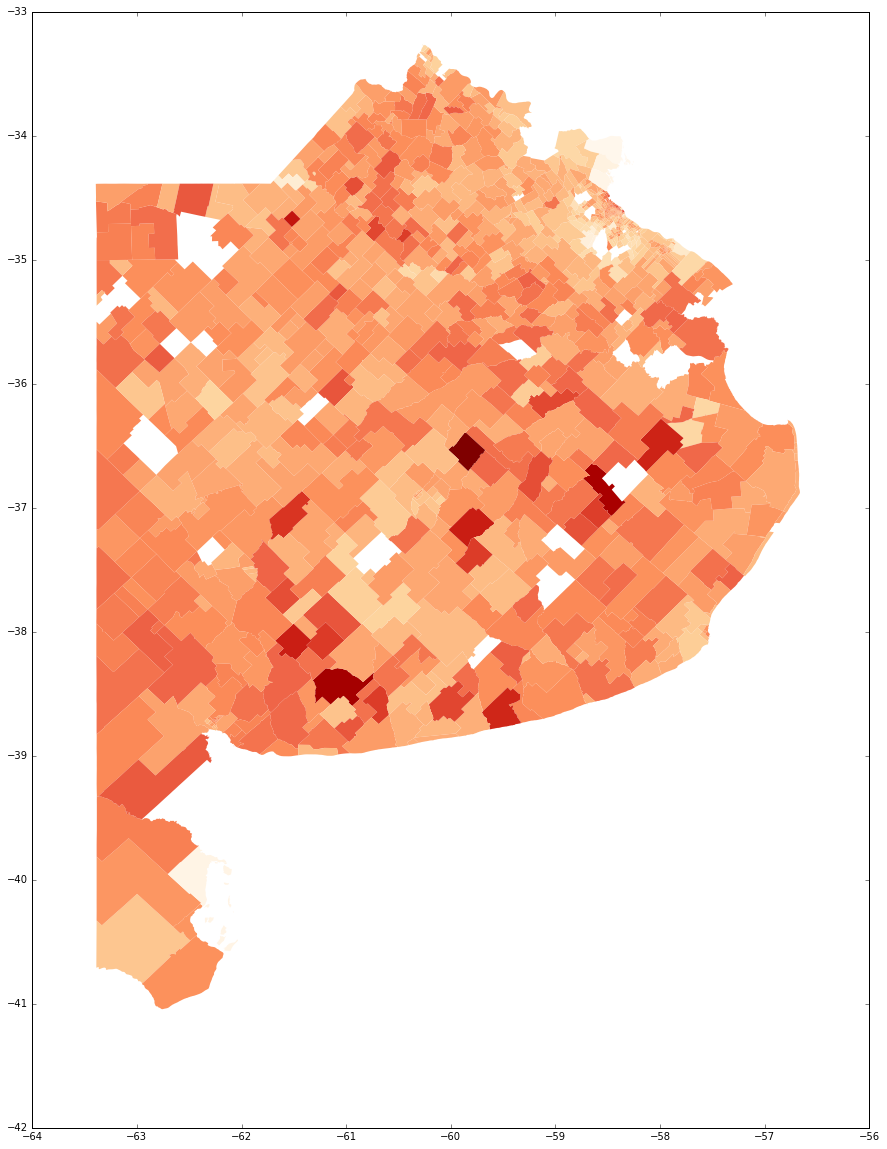

In [213]:
# BA = merged.loc[votos_por_circuito['distrito'].isin(['01', '02'])]

# fig, ax = plt.subplots(1, figsize = (15, 20))
# gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 135]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='OrRd')

# fig, ax = plt.subplots(1, figsize = (17, 18))
# gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 135]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='Blues', alpha = .5)
# gpd.GeoDataFrame(BA.loc[BA['CODIGO VOTOS'] == 131]).plot(column='VOTOS_pct', ax = ax, linewidth = 0, cmap='Reds', alpha = .4)
# ax.set_xlim(-59, -57.8)
# ax.set_ylim(-35.2, -34)